In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  Загрузка исходного датасета

In [0]:
TEST_FILENAME = "/content/drive/My Drive/Colab Notebooks/face keypoints/test.csv"
TRAINING_FILENAME = "/content/drive/My Drive/Colab Notebooks/face keypoints/training.csv"

In [0]:
def load_train_data(filename):
    data = pd.read_csv(filename).dropna()

    images = list(map(lambda x: x.split(), data['Image']))
    X_train = np.array(images, dtype='float')

    keypoints = data[data.columns[:-1]].values
    Y_train = np.array(keypoints, dtype='float')

    return X_train, Y_train

In [0]:
def load_test_data(filename):
    data = pd.read_csv(filename)

    images = list(map(lambda x: x.split(), data['Image']))
    X_train = np.array(images, dtype='float')

    return X_train

In [0]:
X_train, Y_train = load_train_data(TRAINING_FILENAME)
X_test = load_test_data(TEST_FILENAME)

# Пример изображения 

In [0]:
def plot_image(image, keypoints):
    image = image.copy().reshape(96, 96)

    for i in range(0, len(keypoints) - 1, 2):
        image[int(keypoints[i+1]), int(keypoints[i])] = 255

    plt.imshow(image, cmap='gray')
    plt.show()

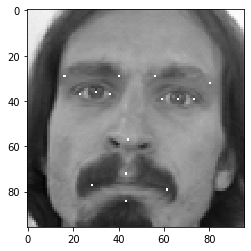

In [102]:
plot_image(X_train[0], Y_train[0])

# Нейронная сеть

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(96*96, )),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(30)
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [125]:
print(X_train.shape)
print(Y_train.shape)

(2140, 9216)
(2140, 30)


In [129]:
epochs_num = 30
model.fit(X_train/255., Y_train, epochs=epochs_num, validation_split=0.2)

Train on 1712 samples, validate on 428 samples
Epoch 1/30
1712/1712 [==============================] - 4s 2ms/sample - loss: 464.8816 - accuracy: 0.4363 - val_loss: 150.4912 - val_accuracy: 0.4322
Epoch 2/30
1712/1712 [==============================] - 4s 2ms/sample - loss: 137.4208 - accuracy: 0.6945 - val_loss: 207.3242 - val_accuracy: 0.4322
Epoch 3/30
1712/1712 [==============================] - 4s 2ms/sample - loss: 114.7583 - accuracy: 0.7389 - val_loss: 155.0537 - val_accuracy: 0.4322
Epoch 4/30
1712/1712 [==============================] - 4s 2ms/sample - loss: 111.2879 - accuracy: 0.7652 - val_loss: 145.4298 - val_accuracy: 0.4322
Epoch 5/30
1712/1712 [==============================] - 4s 2ms/sample - loss: 87.0513 - accuracy: 0.7664 - val_loss: 207.1517 - val_accuracy: 0.4322
Epoch 6/30
1712/1712 [==============================] - 4s 2ms/sample - loss: 86.6798 - accuracy: 0.7629 - val_loss: 141.7825 - val_accuracy: 0.4322
Epoch 7/30
1712/1712 [==============================] -

# Результат

In [0]:
Y_test = model.predict(X_test)

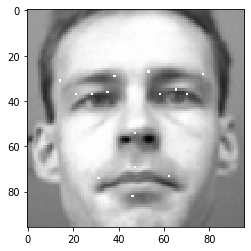

In [131]:
plot_image(X_test[3], Y_test[3]/255.)